<a href="https://colab.research.google.com/github/ella417/ML_Study/blob/main/Siyeon_WK4_during_MLstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기 -> google drive에 업로드 후 마운트하는 방식 사용함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 불러오기
import pandas as pd  # 데이터프레임 다루기
import numpy as np
import seaborn as sns # 시각화 라이브러리
import matplotlib.pyplot as plt # 기본 그래프 그리기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 데이터 불러오기
df = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

# 1. 데이터 준비

In [ ]:
df. head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 간단한 전처리

In [ ]:
# 사용할 컬럼 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']
target = 'Survived'
df = df[features + [target]]

# 결측치 처리(Age)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 범주형 인코딩(Sex)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

<ipython-input-4-9134b5ba90d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].median())
<ipython-input-4-9134b5ba90d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# 3. 학습 / 테스트 데이터 분리

In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
""" 스케일링 하지 않고 실습해본 것
# 4. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

# 상세 보고서
print(classification_report(y_test, y_pred))

# 혼동 행렬
print(confusion_matrix(y_test, y_pred))
"""

'\n# 4. 로지스틱 회귀 모델 학습\nmodel = LogisticRegression(max_iter=200)\nmodel.fit(X_train, y_train)\n\n# 5. 예측 및 평가\ny_pred = model.predict(X_test)\n\n# 정확도 출력\nprint("Accuracy:", accuracy_score(y_test, y_pred))\n\n# 상세 보고서\nprint(classification_report(y_test, y_pred))\n\n# 혼동 행렬\nprint(confusion_matrix(y_test, y_pred))\n'

# 4. 스케일링(Age, Fare column만)

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['Age', 'Fare']
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# 5. 성능 비교- 학습 및 예측

In [ ]:
# 성능 비교: 스케일링 전 학습
model_plain = LogisticRegression(max_iter=200)
model_plain.fit(X_train, y_train)
y_pred_plain = model_plain.predict(X_test)
acc_plain = accuracy_score(y_test, y_pred_plain)

# 성능 비교: 스케일링 후 학습
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 6. 성능 비교- 평가

🎯 Accuracy (No Scaling): 0.7932960893854749
🎯 Accuracy (With Scaling): 0.7932960893854749

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



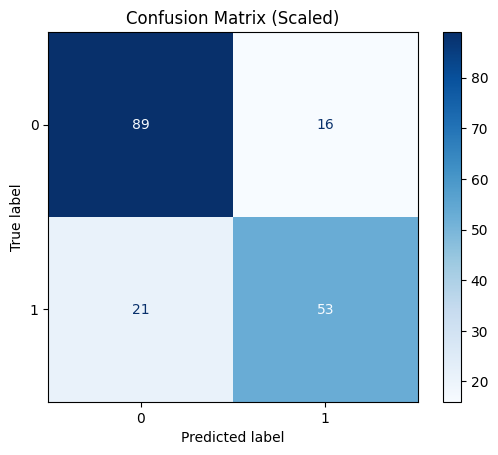


🔍 Feature Importance (Coefficients):
   Feature  Coefficient
1     Sex     2.568076
4    Fare     0.148598
3   SibSp    -0.344485
2     Age    -0.397397
0  Pclass    -0.939968


In [ ]:
# ✅ 결과 비교 출력
print("🎯 Accuracy (No Scaling):", acc_plain)
print("🎯 Accuracy (With Scaling):", acc_scaled)

# 상세 보고서(스케일링 적용된 모델 기준)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred_scaled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_scaled.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Scaled)")
plt.show()

# Feature Importance 해석 (계수 값 보기)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_scaled.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Feature Importance (Coefficients):\n", coef_df)